In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# For plotting inline in Jupyter
%matplotlib inline


# Download historical stock prices

In [4]:
# Define the stock symbol and the time period
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-01-01'

# Download the data
data = yf.download(symbol, start=start_date, end=end_date)

# Display the first few rows
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473151,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


# Calculating Financial Indicator

In [5]:
# Create a copy of the data
df = data.copy()

# Calculate Relative Strength Index (RSI)
df['RSI'] = ta.momentum.rsi(df['Adj Close'], window=14)


# Drop any rows with NaN values (optional)
df.dropna(inplace=True)

# Display the first few rows with indicators
df.head()


,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2010-01-22,7.385000,7.410714,7.041429,7.062500,5.971008,881767600,29.355651
2010-01-25,7.232500,7.310714,7.149643,7.252500,6.131648,1065699600,39.489319
2010-01-26,7.355357,7.632500,7.235000,7.355000,6.218305,1867110000,44.144069
2010-01-27,7.387500,7.520714,7.126071,7.424286,6.276883,1722568400,47.106058
2010-01-28,7.318929,7.339286,7.096429,7.117500,6.017509,1173502400,37.598634


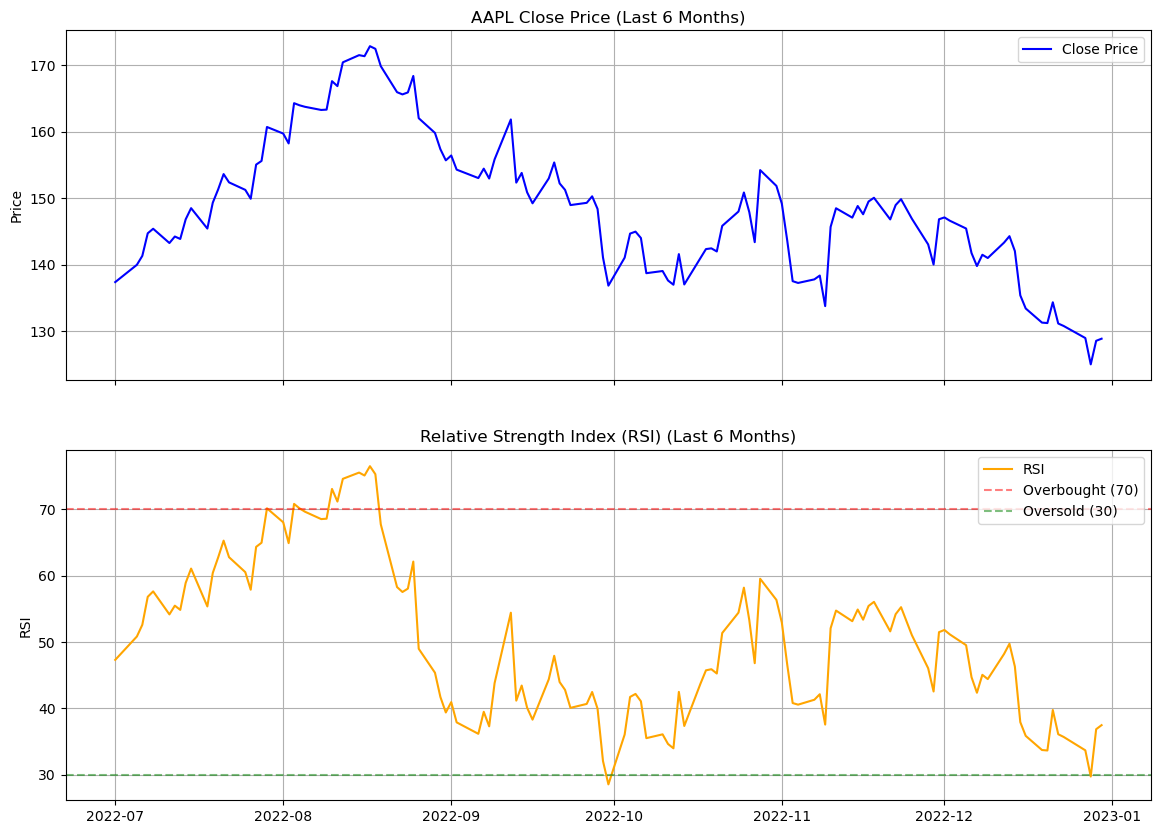

In [17]:
# Filter data for the last 6 months
last_six_months = df.loc[df.index >= (pd.to_datetime(end_date) - pd.DateOffset(months=6))]

# Plot the Close Price and RSI
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 10), sharex=True)

# Plot Close Price
ax1.plot(last_six_months.index, last_six_months['Adj Close'], label='Close Price', color='blue')
ax1.set_title('AAPL Close Price (Last 6 Months)')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# Plot RSI
ax2.plot(last_six_months.index, last_six_months['RSI'], label='RSI', color='orange')
ax2.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')
ax2.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')
ax2.set_title('Relative Strength Index (RSI) (Last 6 Months)')
ax2.set_ylabel('RSI')
ax2.legend()
ax2.grid(True)

plt.show()
